In [114]:
import pandas as pd
import allel
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df_merge = pd.read_csv('../Data/analysis_files/df_merged.csv')

In [116]:
print(df_merge)

     Unnamed: 0             tool  threshold strain  nTP    nFP   nTN  n_true  \
0             0        BioGraph*         10  AKR_J   36    389   206     504   
1             1        BioGraph*        100  AKR_J  249    176   289     504   
2             2        BioGraph*       1000  AKR_J  269    156   299     504   
3             3        BioGraph*      10000  AKR_J  291    134   347     504   
4             4           Tardis         10  AKR_J   51    245   284     504   
5             5           Tardis        100  AKR_J  217     79   341     504   
6             6           Tardis       1000  AKR_J  243     53   350     504   
7             7           Tardis      10000  AKR_J  250     46   390     504   
8             8      breakdancer         10  AKR_J    9    527   253     504   
9             9      breakdancer        100  AKR_J  254    282   314     504   
10           10      breakdancer       1000  AKR_J  311    225   348     504   
11           11      breakdancer      10

# Figure 3a - Sensitivity

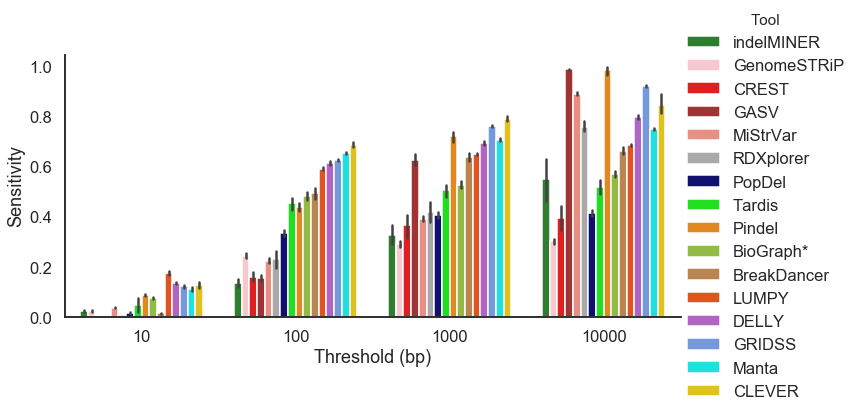

In [117]:
%store -r
fig2a=sns.set_style("white")
fig2a=sns.set_context("talk")

fig_order = ["indelminer","genomestrip","crest","gasv","mistrvar","rdxplorer","popdel","Tardis","pindel","BioGraph*","breakdancer","smoove","delly","gridss","manta_diploidSV","clever"]
labels    = ["indelMINER","GenomeSTRiP","CREST","GASV","MiStrVar","RDXplorer","PopDel","Tardis","Pindel","BioGraph*","BreakDancer","LUMPY","DELLY","GRIDSS","Manta","CLEVER"]
df_merge["Tool"] = df_merge["tool"].map(dict(zip(fig_order, labels)))

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2a = sns.catplot(x="threshold", y="sensitivity", kind="bar",errwidth=2.5,data = df_merge,hue="Tool",aspect=2.0, palette=pal,hue_order=labels)
fig2a.set(xlabel='Threshold (bp)', ylabel='Sensitivity')
fig2a=sns.despine()
plt.xticks(rotation=0)
#plt.show(fig2a)

plt.savefig("../Figures/fig3/fig3a", bbox_inches='tight')
plt.savefig("../Figures/fig3/fig3a.pdf", bbox_inches='tight')

In [118]:
print(df_merge)

     Unnamed: 0             tool  threshold strain  nTP    nFP   nTN  n_true  \
0             0        BioGraph*         10  AKR_J   36    389   206     504   
1             1        BioGraph*        100  AKR_J  249    176   289     504   
2             2        BioGraph*       1000  AKR_J  269    156   299     504   
3             3        BioGraph*      10000  AKR_J  291    134   347     504   
4             4           Tardis         10  AKR_J   51    245   284     504   
5             5           Tardis        100  AKR_J  217     79   341     504   
6             6           Tardis       1000  AKR_J  243     53   350     504   
7             7           Tardis      10000  AKR_J  250     46   390     504   
8             8      breakdancer         10  AKR_J    9    527   253     504   
9             9      breakdancer        100  AKR_J  254    282   314     504   
10           10      breakdancer       1000  AKR_J  311    225   348     504   
11           11      breakdancer      10

# Figure 3b - Precision

In [119]:
# df_merge.loc[df_merge["tool"]=="popdel"]
# df_mean.loc[df_mean['threshold'] == 100]

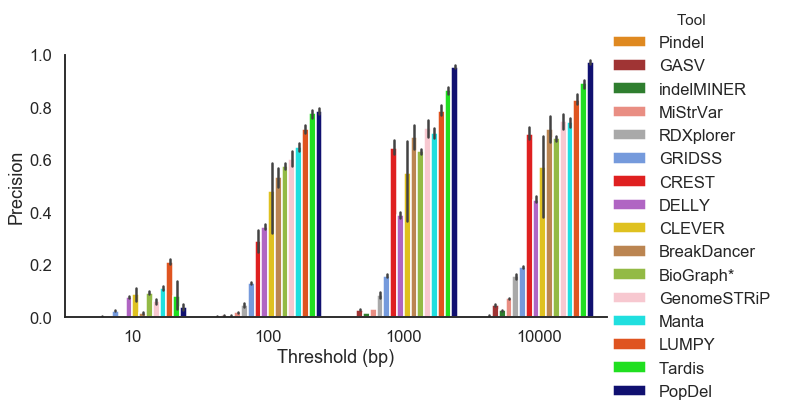

In [120]:
%store -r
fig2b=sns.set_style("white")
fig2b=sns.set_context("talk")
fig_order = ['pindel','gasv','indelminer',
             'mistrvar','rdxplorer','gridss',
            'crest','delly','clever',
            'breakdancer','BioGraph*','genomestrip','manta_diploidSV','smoove','Tardis','popdel']
labels = ['Pindel','GASV','indelMINER',
             'MiStrVar','RDXplorer','GRIDSS',
            'CREST','DELLY','CLEVER',
            'BreakDancer','BioGraph*','GenomeSTRiP','Manta','LUMPY','Tardis','PopDel']

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2b = sns.catplot(x="threshold", y="precision", kind="bar",errwidth=2.5,data = df_merge,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
plt.ylim(0, 1)
fig2b.set(xlabel='Threshold (bp)', ylabel='Precision')
fig2b=sns.despine()
#plt.show(fig2b)

plt.savefig("../Figures/fig3/fig3b", bbox_inches='tight')
plt.savefig("../Figures/fig3/fig3b.pdf", bbox_inches='tight')

# Figure 3c - Specificity

In [121]:
df_temp=df_merge.loc[df_merge["threshold"]==100]

In [122]:
print(df_temp.loc[df_temp['tool'] == 'smoove','specificity'].sum()/7)
df_temp.loc[df_temp['tool'] == 'manta_diploidSV','specificity'].sum()/7

0.7495291140259835


0.7434197768534558

In [123]:
# df_merge.loc[df_merge["threshold"]==100]

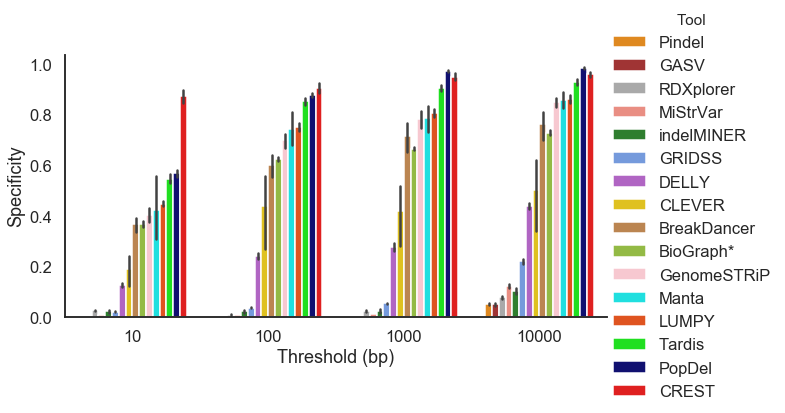

In [124]:
%store -r
fig2c=sns.set_style("white")
fig2c=sns.set_context("talk")

fig_order = ["pindel","gasv","rdxplorer","mistrvar","indelminer","gridss","delly","clever",
"breakdancer","BioGraph*","genomestrip","manta_diploidSV","smoove","Tardis","popdel","crest"]
labels = ["Pindel","GASV","RDXplorer","MiStrVar","indelMINER","GRIDSS","DELLY",
          "CLEVER","BreakDancer","BioGraph*","GenomeSTRiP","Manta","LUMPY","Tardis","PopDel","CREST"]

pal = []
for tool in fig_order:
    pal.append(color_map[tool])


fig2c = sns.catplot(x="threshold", y="specificity", kind="bar",errwidth=2.5,data = df_merge,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
fig2c.set(xlabel='Threshold (bp)', ylabel='Specificity')
fig2c=sns.despine()
#plt.show(fig2c)

plt.savefig("../Figures/fig3/fig3c", bbox_inches='tight')
plt.savefig("../Figures/fig3/fig3c.pdf", bbox_inches='tight')

# Figure 3d - F-score

In [125]:
print(df_temp.loc[df_temp['tool'] == 'smoove','f-score'].sum()/7)
df_temp.loc[df_temp['tool'] == 'manta_diploidSV','f-score'].sum()/7

0.6480195417676281


0.6503160645679096

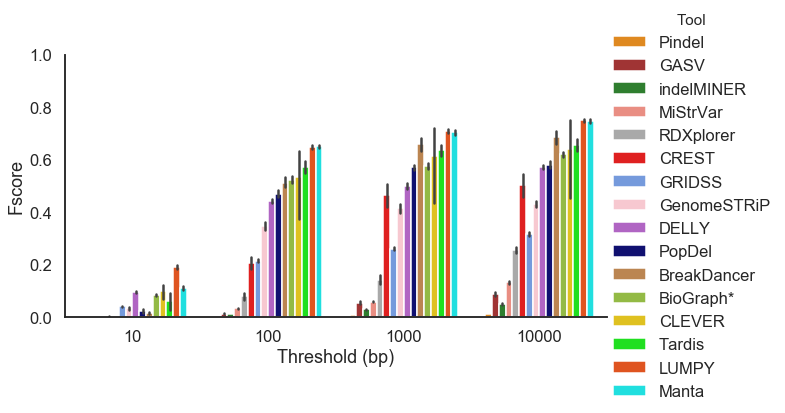

In [126]:
%store -r
fig2d=sns.set_style("white")
fig2d=sns.set_context("talk")

fig_order = ["pindel","gasv","indelminer","mistrvar","rdxplorer","crest","gridss","genomestrip","delly","popdel","breakdancer","BioGraph*","clever","Tardis","smoove","manta_diploidSV"]

labels = ["Pindel","GASV","indelMINER","MiStrVar","RDXplorer","CREST","GRIDSS","GenomeSTRiP","DELLY","PopDel","BreakDancer","BioGraph*","CLEVER","Tardis","LUMPY","Manta"]
pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2d = sns.catplot(x="threshold", y="f-score", kind="bar",errwidth=2.5,data = df_merge,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
fig2d.set(xlabel='Threshold (bp)', ylabel='Fscore')
fig2d=sns.despine()
plt.ylim(0, 1)
#plt.show(fig2d)

plt.savefig("../Figures/fig3/fig3d", bbox_inches='tight')
plt.savefig("../Figures/fig3/fig3d.pdf", bbox_inches='tight')

In [127]:
df_merge

,Unnamed: 0,tool,threshold,strain,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score,Tool
0,0,BioGraph*,10,AKR_J,36,389,206,504,468,0.071429,0.084706,0.346218,0.077503,BioGraph*
1,1,BioGraph*,100,AKR_J,249,176,289,504,255,0.494048,0.585882,0.621505,0.536060,BioGraph*
2,2,BioGraph*,1000,AKR_J,269,156,299,504,235,0.533730,0.632941,0.657143,0.579117,BioGraph*
3,3,BioGraph*,10000,AKR_J,291,134,347,504,213,0.577381,0.684706,0.721414,0.626480,BioGraph*
4,4,Tardis,10,AKR_J,51,245,284,504,453,0.101190,0.172297,0.536862,0.127500,Tardis
5,5,Tardis,100,AKR_J,217,79,341,504,287,0.430556,0.733108,0.811905,0.542500,Tardis
6,6,Tardis,1000,AKR_J,243,53,350,504,261,0.482143,0.820946,0.868486,0.607500,Tardis
7,7,Tardis,10000,AKR_J,250,46,390,504,254,0.496032,0.844595,0.894495,0.625000,Tardis
8,8,breakdancer,10,AKR_J,9,527,253,504,495,0.017857,0.016791,0.324359,0.017308,BreakDancer
9,9,breakdancer,100,AKR_J,254,282,314,504,250,0.503968,0.473881,0.526846,0.488462,BreakDancer


In [128]:
fig_order = ["indelminer","genomestrip","crest","gasv","mistrvar","rdxplorer","popdel","Tardis","pindel","BioGraph*","breakdancer","smoove","delly","gridss","manta_diploidSV","clever"]
labels    = ["indelMINER","GenomeSTRiP","CREST","GASV","MiStrVar","RDXplorer","PopDel","Tardis","Pindel","BioGraph*","BreakDancer","LUMPY","DELLY","GRIDSS","Manta","CLEVER"]
df_mean["Tool"] = df_mean["tool"].map(dict(zip(fig_order, labels)))

In [129]:
df_mean=df_merge.groupby(['tool','threshold'],as_index=False).mean()
df_mean.head()

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
0,BioGraph*,10,192.0,42.428571,411.142857,238.857143,542.714286,500.285714,0.078281,0.093773,0.367228,0.085301
1,BioGraph*,100,193.0,261.000000,192.571429,321.285714,542.714286,281.714286,0.481218,0.576129,0.625650,0.524250
2,BioGraph*,1000,194.0,286.285714,167.285714,333.000000,542.714286,256.428571,0.527502,0.631530,0.665834,0.574669
3,BioGraph*,10000,195.0,309.000000,144.571429,388.142857,542.714286,233.714286,0.569452,0.681937,0.728891,0.620445
4,Tardis,10,196.0,25.000000,292.571429,349.857143,542.714286,517.714286,0.047280,0.082853,0.545834,0.060141


# Figure 3e

In [147]:
color_map1 = {'BioGraph*':'yellowgreen', 'BreakDancer':'peru', 'CLEVER':'gold', 'DELLY':'darkorange', 'DELLY':'mediumorchid', 
             'GASV':'firebrick', 'GRIDSS':'cornflowerblue', 'indelMINER':'forestgreen', 
             'MiStrVar':'salmon', 'Pindel':'darkorange', 'PopDel':'navy', 'RDXplorer':'darkgray', 
             'LUMPY':'orangered', 'true deletions':'black', 'CREST':'red', 'GenomeSTRiP':'pink','Manta':'aqua','Tardis':'lime'}

In [148]:
fig_order = ["pindel","gasv","indelminer","mistrvar","rdxplorer","gridss","delly","popdel","breakdancer","BioGraph*","clever","smoove","crest","genomestrip","manta_diploidSV","Tardis"]
labels = ["Pindel","GASV","indelMINER","MiStrVar","RDXplorer","GRIDSS","DELLY","PopDel","BreakDancer","BioGraph*","CLEVER","LUMPY","CREST","GenomeSTRiP","Manta","Tardis"]
df_mean["Tool"] = df_mean["tool"].map(dict(zip(fig_order, labels)))

In [149]:
df_mean.loc[df_mean['threshold'] == 100]

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score,Tool
1,BioGraph*,100,193.0,261.000000,192.571429,321.285714,542.714286,281.714286,0.481218,0.576129,0.625650,0.524250,BioGraph*
5,Tardis,100,197.0,247.000000,70.571429,411.000000,542.714286,295.714286,0.453610,0.777015,0.852439,0.572233,Tardis
9,breakdancer,100,201.0,269.000000,237.000000,354.714286,542.714286,273.714286,0.495073,0.533950,0.600475,0.512197,BreakDancer
13,clever,100,205.0,373.285714,1591.857143,280.428571,542.714286,169.428571,0.687630,0.480740,0.438855,0.535614,CLEVER
17,crest,100,208.0,87.142857,220.857143,2354.285714,542.714286,455.571429,0.160326,0.289534,0.905869,0.205136,CREST
21,delly,100,212.0,332.714286,634.857143,201.285714,542.714286,210.000000,0.613310,0.344820,0.241920,0.441296,DELLY
25,gasv,100,215.0,85.285714,11698.285714,13.285714,542.714286,457.428571,0.156235,0.007331,0.001160,0.013994,GASV
29,genomestrip,100,219.0,132.285714,87.285714,204.142857,542.714286,410.428571,0.244561,0.603770,0.698914,0.347888,GenomeSTRiP
33,gridss,100,223.0,339.857143,2280.571429,90.857143,542.714286,202.857143,0.626500,0.130083,0.038354,0.215390,GRIDSS
37,indelminer,100,227.0,74.285714,11143.000000,246.714286,542.714286,468.428571,0.136571,0.006657,0.023220,0.012675,indelMINER


In [150]:
fig_order = ["indelminer","genomestrip","crest","gasv","mistrvar","rdxplorer","popdel","Tardis","pindel","BioGraph*","breakdancer","smoove","delly","gridss","manta_diploidSV","clever"]
labels    = ["indelMINER","GenomeSTRiP","CREST","GASV","MiStrVar","RDXplorer","PopDel","Tardis","Pindel","BioGraph*","BreakDancer","LUMPY","DELLY","GRIDSS","Manta","CLEVER"]
df_mean["Tool"] = df_mean["tool"].map(dict(zip(fig_order, labels)))

In [151]:
df_mean.loc[df_mean['threshold'] == 100]

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score,Tool
1,BioGraph*,100,193.0,261.000000,192.571429,321.285714,542.714286,281.714286,0.481218,0.576129,0.625650,0.524250,BioGraph*
5,Tardis,100,197.0,247.000000,70.571429,411.000000,542.714286,295.714286,0.453610,0.777015,0.852439,0.572233,Tardis
9,breakdancer,100,201.0,269.000000,237.000000,354.714286,542.714286,273.714286,0.495073,0.533950,0.600475,0.512197,BreakDancer
13,clever,100,205.0,373.285714,1591.857143,280.428571,542.714286,169.428571,0.687630,0.480740,0.438855,0.535614,CLEVER
17,crest,100,208.0,87.142857,220.857143,2354.285714,542.714286,455.571429,0.160326,0.289534,0.905869,0.205136,CREST
21,delly,100,212.0,332.714286,634.857143,201.285714,542.714286,210.000000,0.613310,0.344820,0.241920,0.441296,DELLY
25,gasv,100,215.0,85.285714,11698.285714,13.285714,542.714286,457.428571,0.156235,0.007331,0.001160,0.013994,GASV
29,genomestrip,100,219.0,132.285714,87.285714,204.142857,542.714286,410.428571,0.244561,0.603770,0.698914,0.347888,GenomeSTRiP
33,gridss,100,223.0,339.857143,2280.571429,90.857143,542.714286,202.857143,0.626500,0.130083,0.038354,0.215390,GRIDSS
37,indelminer,100,227.0,74.285714,11143.000000,246.714286,542.714286,468.428571,0.136571,0.006657,0.023220,0.012675,indelMINER


In [152]:
df_mean.dtypes

tool            object
threshold        int64
Unnamed: 0     float64
nTP            float64
nFP            float64
nTN            float64
n_true         float64
nFN            float64
sensitivity    float64
precision      float64
specificity    float64
f-score        float64
Tool            object
dtype: object

In [153]:
data=df_mean.loc[df_mean['threshold'] == threshold]

In [154]:
data

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score,Tool
1,BioGraph*,100,193.0,261.000000,192.571429,321.285714,542.714286,281.714286,0.481218,0.576129,0.625650,0.524250,BioGraph*
5,Tardis,100,197.0,247.000000,70.571429,411.000000,542.714286,295.714286,0.453610,0.777015,0.852439,0.572233,Tardis
9,breakdancer,100,201.0,269.000000,237.000000,354.714286,542.714286,273.714286,0.495073,0.533950,0.600475,0.512197,BreakDancer
13,clever,100,205.0,373.285714,1591.857143,280.428571,542.714286,169.428571,0.687630,0.480740,0.438855,0.535614,CLEVER
17,crest,100,208.0,87.142857,220.857143,2354.285714,542.714286,455.571429,0.160326,0.289534,0.905869,0.205136,CREST
21,delly,100,212.0,332.714286,634.857143,201.285714,542.714286,210.000000,0.613310,0.344820,0.241920,0.441296,DELLY
25,gasv,100,215.0,85.285714,11698.285714,13.285714,542.714286,457.428571,0.156235,0.007331,0.001160,0.013994,GASV
29,genomestrip,100,219.0,132.285714,87.285714,204.142857,542.714286,410.428571,0.244561,0.603770,0.698914,0.347888,GenomeSTRiP
33,gridss,100,223.0,339.857143,2280.571429,90.857143,542.714286,202.857143,0.626500,0.130083,0.038354,0.215390,GRIDSS
37,indelminer,100,227.0,74.285714,11143.000000,246.714286,542.714286,468.428571,0.136571,0.006657,0.023220,0.012675,indelMINER


In [155]:
df_mean.loc[df_mean['threshold'] == threshold]

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score,Tool
1,BioGraph*,100,193.0,261.000000,192.571429,321.285714,542.714286,281.714286,0.481218,0.576129,0.625650,0.524250,BioGraph*
5,Tardis,100,197.0,247.000000,70.571429,411.000000,542.714286,295.714286,0.453610,0.777015,0.852439,0.572233,Tardis
9,breakdancer,100,201.0,269.000000,237.000000,354.714286,542.714286,273.714286,0.495073,0.533950,0.600475,0.512197,BreakDancer
13,clever,100,205.0,373.285714,1591.857143,280.428571,542.714286,169.428571,0.687630,0.480740,0.438855,0.535614,CLEVER
17,crest,100,208.0,87.142857,220.857143,2354.285714,542.714286,455.571429,0.160326,0.289534,0.905869,0.205136,CREST
21,delly,100,212.0,332.714286,634.857143,201.285714,542.714286,210.000000,0.613310,0.344820,0.241920,0.441296,DELLY
25,gasv,100,215.0,85.285714,11698.285714,13.285714,542.714286,457.428571,0.156235,0.007331,0.001160,0.013994,GASV
29,genomestrip,100,219.0,132.285714,87.285714,204.142857,542.714286,410.428571,0.244561,0.603770,0.698914,0.347888,GenomeSTRiP
33,gridss,100,223.0,339.857143,2280.571429,90.857143,542.714286,202.857143,0.626500,0.130083,0.038354,0.215390,GRIDSS
37,indelminer,100,227.0,74.285714,11143.000000,246.714286,542.714286,468.428571,0.136571,0.006657,0.023220,0.012675,indelMINER


In [156]:
df_new=df_mean.loc[df_mean['threshold'] == 100]

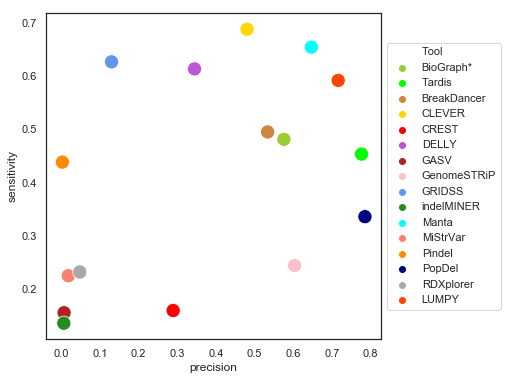

In [157]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.set_style("white")
# sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="precision", y="sensitivity", data=df_new,hue='Tool',s=200,palette=color_map1)
ax.ticks=[0,0.2,0.4,0.6,0.8,1]
ax.legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1)
sns.set(rc={'figure.figsize':(6,6)})

In [158]:
# import matplotlib.pyplot as plt
# import numpy as np
# for th in [100]:
#     g=sns.set_style("white")
#     g=sns.set_context("talk")
    
#     g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='sensitivity', hue='nTN',fit_reg=False,aspect=1,scatter_kws={"s": 300})
#     g.set(xlabel='Precision', ylabel='Sensitivity')
#     plt.title(str(th)+"bp")
#     ticks=[0,0.2,0.4,0.6,0.8,1]
#     g.ax.set_xticks(ticks)
#     g.ax.set_yticks(ticks)

#     g=sns.despine()
# plt.savefig("../Figures/fig3/fig3e.pdf", bbox_inches='tight')
# plt.savefig("../Figures/fig3/fig3e", bbox_inches='tight')

In [159]:
# # import matplotlib.pyplot as plt
# # import numpy as np
# # for threshold in [100]:
#     g=sns.set_style("white")
#     g=sns.set_context("talk")
    
#     g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == threshold], x='precision', y='sensitivity')
# #     g.set(xlabel='Precision', ylabel='Sensitivity')
# #     plt.title(str(th)+"bp")
# #     ticks=[0,0.2,0.4,0.6,0.8,1]
# #     g.ax.set_xticks(ticks)
# #     g.ax.set_yticks(ticks)

# #     g=sns.despine()
# # plt.savefig("../Figures/fig3/fig3e.pdf", bbox_inches='tight')
# # plt.savefig("../Figures/fig3/fig3e", bbox_inches='tight')

In [160]:
# g=sns.set_style("white")
# g=sns.set_context("talk")
# g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == threshold], x='precision', y='sensitivity', hue='Tool')


# Figure 3f

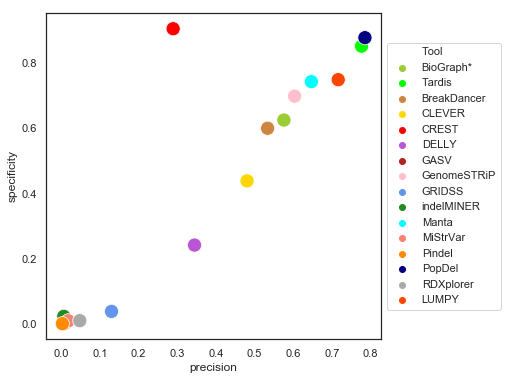

In [161]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.set_style("white")
# sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="precision", y="specificity", data=df_new,hue='Tool',s=200,palette=color_map1)
ax.ticks=[0,0.2,0.4,0.6,0.8,1]
ax.legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1)
sns.set(rc={'figure.figsize':(6,6)})

In [162]:
# for th in [100]:
#     g=sns.set_style("white")
#     g=sns.set_context("talk")
    
#     g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='specificity', hue='Tool',fit_reg=False,aspect=1,scatter_kws={"s": 300}, palette=color_map1)
#     g.set(xlabel='Precision', ylabel='Specificity')
#     plt.title(str(th)+"bp")
#     ticks=[0,0.2,0.4,0.6,0.8,1]
#     g.ax.set_xticks(ticks)
#     g.ax.set_yticks(ticks)
#     g=sns.despine()
# plt.savefig("../Figures/fig3/fig3f.pdf", bbox_inches='tight')
# plt.savefig("../Figures/fig3/fig3f", bbox_inches='tight')